In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file = "mundo_transfermarkt_competicoes_brasileirao_serie_a.csv"
df = pd.read_csv(file)

In [5]:
pd.set_option('display.max_columns', None)
df[(df['rodada'] == 1) & (df['ano_campeonato'] == 2023)]


,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,gols_1_tempo_mandante,gols_1_tempo_visitante,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
7323,2023,4/15/2023,1,Ligga Arena,Rafael Rodrigo Klein,15329.0,42372.0,Athletico-PR,Goiás,Paulo Turra,Émerson Ávila,3.0,18.0,2680.0,895.0,26.9,29.0,2.0,0.0,1.0,0.0,3.0,8.0,19.0,18.0,17.0,18.0,2.0,1.0,1.0,1.0,11.0,16.0,4.0,8.0
7388,2023,4/16/2023,1,Estádio Alfredo Jaconi,Wilton Sampaio,13997.0,23540.0,Grêmio,Santos,Renato Portaluppi,Odair Hellmann,9.0,17.0,2470.0,3880.0,28.0,26.1,1.0,0.0,1.0,0.0,4.0,11.0,12.0,16.0,15.0,12.0,4.0,5.0,1.0,1.0,17.0,16.0,6.0,8.0
7390,2023,4/16/2023,1,Estádio Jornalista Mário Filho,Rodrigo Jose Pereira de Lima,42848.0,78838.0,Flamengo,Coritiba FC,Mário Jorge,Toni Oliveira,2.0,19.0,7965.0,1800.0,26.5,28.3,3.0,0.0,1.0,0.0,6.0,3.0,20.0,17.0,17.0,19.0,3.0,4.0,1.0,2.0,15.0,10.0,5.0,2.0
7401,2023,4/15/2023,1,Allianz Parque,Paulo Cesar Zanovelli,35835.0,NaN,Palmeiras,Cuiabá-MT,Abel Ferreira,Ivo Vieira,4.0,15.0,8420.0,593.0,26.8,29.6,2.0,1.0,1.0,1.0,4.0,4.0,23.0,12.0,12.0,21.0,3.0,3.0,3.0,2.0,17.0,12.0,7.0,6.0
7420,2023,4/16/2023,1,Neo Química Arena,Anderson Daronco,41304.0,49205.0,Corinthians,Cruzeiro,Fernando Lázaro,Pepa,7.0,13.0,5120.0,2090.0,27.6,28.7,2.0,1.0,0.0,0.0,7.0,4.0,14.0,12.0,11.0,14.0,1.0,5.0,4.0,3.0,12.0,8.0,4.0,3.0
7447,2023,4/15/2023,1,Estádio Olímpico Nilton Santos,Ramon Abatti,11708.0,46931.0,Botafogo,São Paulo,Luís Castro,Rogério Ceni,6.0,14.0,2080.0,2840.0,29.9,29.1,2.0,1.0,1.0,1.0,3.0,7.0,20.0,13.0,10.0,20.0,7.0,1.0,2.0,1.0,12.0,16.0,5.0,6.0
7481,2023,4/15/2023,1,Estádio Nabi Abi Chedid,Maguielson Lima Barbosa,3368.0,13212.0,RB Bragantino,EC Bahia,Pedro Caixinha,Renato Paiva,5.0,12.0,2210.0,1945.0,23.7,26.5,2.0,1.0,0.0,1.0,4.0,7.0,20.0,13.0,13.0,20.0,2.0,5.0,2.0,3.0,13.0,9.0,4.0,5.0
7490,2023,4/15/2023,1,Estádio Governador Plácido Castelo,Edina Alves Batista,30191.0,60326.0,Fortaleza,Internacional,Juan Pablo Vojvoda,Mano Menezes,11.0,10.0,1280.0,3280.0,30.7,27.6,1.0,1.0,0.0,0.0,5.0,1.0,18.0,13.0,13.0,16.0,5.0,5.0,0.0,2.0,24.0,11.0,7.0,5.0
7567,2023,4/16/2023,1,Estádio Governador Magalhães Pinto,Raphael Claus,34980.0,57483.0,Atlético-MG,Vasco da Gama,Eduardo Coudet,Maurício Barbieri,16.0,8.0,4650.0,4970.0,28.5,25.4,1.0,2.0,1.0,2.0,14.0,3.0,15.0,10.0,9.0,15.0,1.0,9.0,2.0,2.0,26.0,7.0,7.0,1.0
7629,2023,4/15/2023,1,Estádio Raimundo Sampaio,Braulio da Silva Machado,6653.0,25000.0,América-MG,Fluminense,Vagner Mancini,Fernando Diniz,20.0,1.0,880.0,3525.0,32.1,27.7,0.0,3.0,0.0,0.0,11.0,1.0,25.0,9.0,8.0,24.0,5.0,2.0,2.0,3.0,17.0,15.0,9.0,3.0


In [6]:
df_gols = df[df['ano_campeonato'] == 2023][['ano_campeonato', 'rodada', 'time_mandante', 'time_visitante', 'gols_mandante', 'gols_visitante', 'colocacao_mandante', 'colocacao_visitante']]
df_gols = df_gols.sort_values(by='rodada')
df_gols_rodada1 = df_gols[df_gols['rodada'] == 1]

df_gols.head(5)

,ano_campeonato,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante,colocacao_mandante,colocacao_visitante
7323,2023,1,Athletico-PR,Goiás,2.0,0.0,3.0,18.0
7390,2023,1,Flamengo,Coritiba FC,3.0,0.0,2.0,19.0
7401,2023,1,Palmeiras,Cuiabá-MT,2.0,1.0,4.0,15.0
7567,2023,1,Atlético-MG,Vasco da Gama,1.0,2.0,16.0,8.0
7388,2023,1,Grêmio,Santos,1.0,0.0,9.0,17.0


In [30]:
times = {
    "Athletico-PR": 0,
    "Goiás": 1,
    "Grêmio": 2,
    "Santos": 3,
    "Flamengo": 4,
    "Coritiba FC": 5,
    "Palmeiras": 6,
    "Cuiabá-MT": 7,
    "Corinthians": 8,
    "Cruzeiro": 9,
    "Botafogo": 10,
    "São Paulo": 11,
    "RB Bragantino": 12,
    "EC Bahia": 13,
    "Fortaleza": 14,
    "Internacional": 15,
    "Atlético-MG": 16,
    "Vasco da Gama": 17,
    "América-MG": 18,
    "Fluminense": 19
}

pares_e_resultados = []

for i in range(10):
    time_mandante = df_gols.iloc[i, 2] # gols time mandante
    time_visitante = df_gols.iloc[i, 3]  # gols time visitante
    resultado = df_gols.iloc[i, 4] - df_gols.iloc[i, 5]  # diferença de gols 
    
    pares_e_resultados.append((time_mandante, time_visitante, resultado))



In [31]:
num_times = len(times)
num_equacoes = len(pares_e_resultados)
A = np.zeros((num_equacoes, num_times))
b = np.zeros(num_equacoes)

In [32]:
for i, (time1, time2, resultado) in enumerate(pares_e_resultados):
    indice1 = times[time1]
    indice2 = times[time2]
    
    A[i, indice1] = 1    # Sinaliza 1 para time mandante
    A[i, indice2] = -1   # Sinaliza -1 para o time visitante
    b[i] = resultado     # Coloca o resultado na posição correta em b

In [33]:
x,_,_,_ = np.linalg.lstsq(A, b, rcond=None)

In [34]:
indice_para_times = {indice: nome for nome, indice in times.items()}

# Combine os valores de `x` com os nomes dos times usando o dicionário invertido
times_valores = [(indice_para_times[i], x[i]) for i in range(len(x))]

# Ordene a lista pelo valor de `x` (segundo item da tupla)
times_valores_ordenados = sorted(times_valores, key=lambda item: item[1], reverse=True)  # Coloque reverse=False para ordem crescente

# Exibindo os times ordenados
print("Times ordenados pelos valores de x:")
for time, valor in times_valores_ordenados:
    print(f"{time}: {valor:.2f}")

Times ordenados pelos valores de x:
Flamengo: 1.50
Fluminense: 1.50
Athletico-PR: 1.00
Grêmio: 0.50
Corinthians: 0.50
Botafogo: 0.50
RB Bragantino: 0.50
Palmeiras: 0.50
Vasco da Gama: 0.50
Fortaleza: 0.00
Internacional: 0.00
Cuiabá-MT: -0.50
Atlético-MG: -0.50
Cruzeiro: -0.50
São Paulo: -0.50
EC Bahia: -0.50
Santos: -0.50
Goiás: -1.00
Coritiba FC: -1.50
América-MG: -1.50


In [12]:
def ranking_times(df, times, rodada):
    pares_e_resultados = []

    for i in range(rodada*10):
        time_mandante = df.iloc[i, 2] # gols time mandante
        time_visitante = df.iloc[i, 3]  # gols time visitante
        resultado = df.iloc[i, 4] - df.iloc[i, 5]  # diferença de gols 
        
        pares_e_resultados.append((time_mandante, time_visitante, resultado))

    num_times = len(times)
    num_equacoes = len(pares_e_resultados)
    A = np.zeros((num_equacoes, num_times))
    b = np.zeros(num_equacoes)

    for i, (time1, time2, resultado) in enumerate(pares_e_resultados):
        indice1 = times[time1]
        indice2 = times[time2]
        
        A[i, indice1] = 1    # Sinaliza 1 para time mandante
        A[i, indice2] = -1   # Sinaliza -1 para o time visitante
        b[i] = resultado     # Coloca o resultado na posição correta em b

    x,_,_,_ = np.linalg.lstsq(A, b, rcond=None)

    indice_para_times = {indice: nome for nome, indice in times.items()}

    # Combine os valores de `x` com os nomes dos times usando o dicionário invertido
    times_valores = [(indice_para_times[i], x[i]) for i in range(len(x))]

    # Ordene a lista pelo valor de `x` (segundo item da tupla)
    times_valores_ordenados = sorted(times_valores, key=lambda item: item[1], reverse=True)  # Coloque reverse=False para ordem crescente

    return times_valores_ordenados

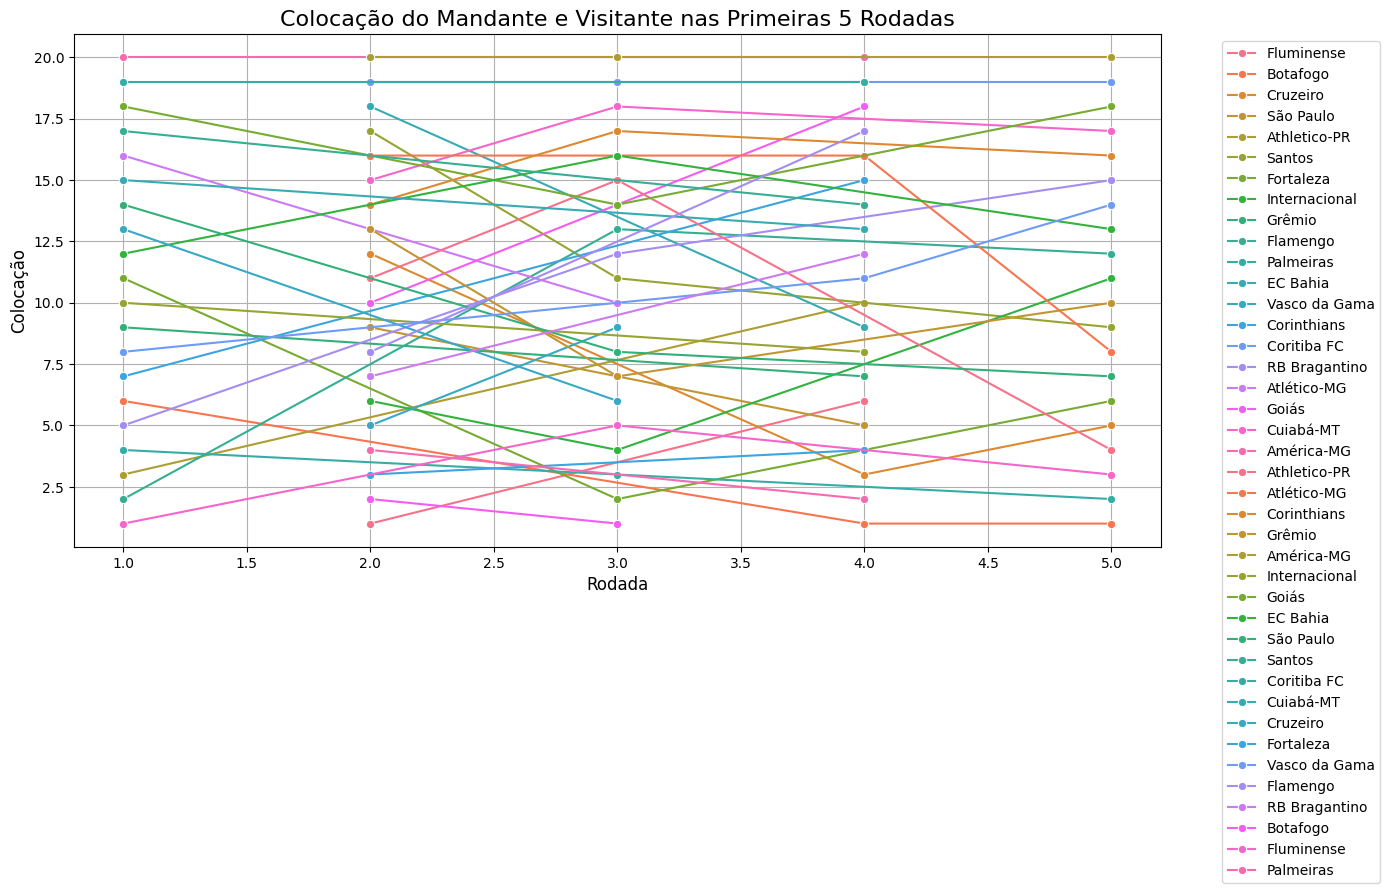

In [13]:
df_rodadas = df[df['ano_campeonato'] == 2023][['ano_campeonato', 'rodada', 'time_mandante', 'time_visitante', 'gols_mandante', 'gols_visitante', 'colocacao_mandante' ,'colocacao_visitante']]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_rodadas[df_rodadas['rodada'] <= 5], 
    x='rodada', 
    y='colocacao_mandante', 
    hue='time_mandante', 
    marker='o', 
    legend='brief', 
)
sns.lineplot(
    data=df_rodadas[df_rodadas['rodada'] <= 5], 
    x='rodada', 
    y='colocacao_visitante', 
    hue='time_visitante', 
    marker='o', 
    legend='brief', 
)

plt.title('Colocação do Mandante e Visitante nas Primeiras 5 Rodadas', fontsize=16)
plt.xlabel('Rodada', fontsize=12)
plt.ylabel('Colocação', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar posição da legenda
plt.grid(True)
plt.tight_layout() 
plt.show()

In [14]:
df_mandantes = df_rodadas[['rodada', 'time_mandante', 'colocacao_mandante']].rename(
    columns={'time_mandante': 'time', 'colocacao_mandante': 'colocacao'}
)
df_visitantes = df_rodadas[['rodada', 'time_visitante', 'colocacao_visitante']].rename(
    columns={'time_visitante': 'time', 'colocacao_visitante': 'colocacao'}
)
df_times = pd.concat([df_mandantes, df_visitantes], ignore_index=True)
df_times = df_times.sort_values(by=['rodada', 'time']).reset_index(drop=True)

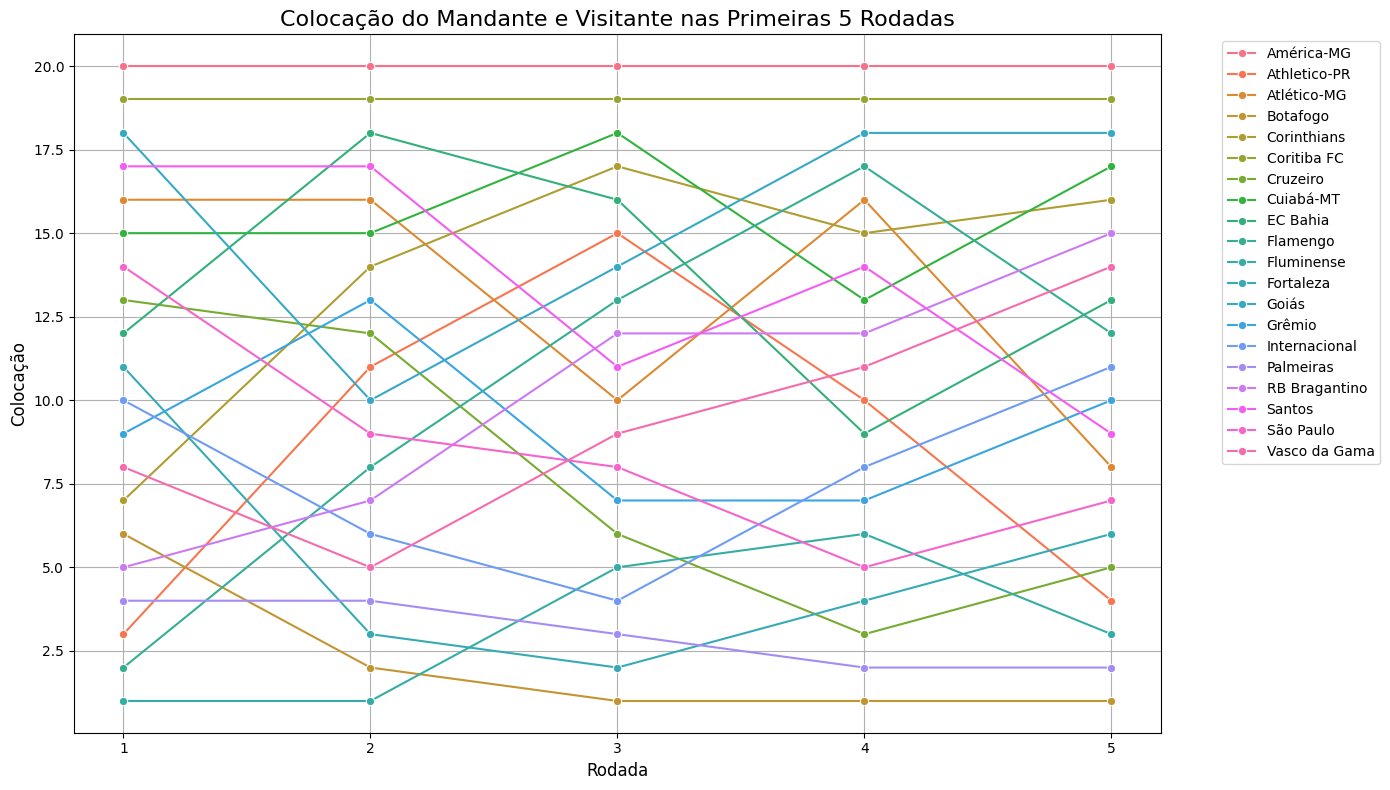

In [15]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_times[df_times['rodada'] <= 5], 
    x='rodada', 
    y='colocacao', 
    hue='time', 
    marker='o', 
    legend='brief', 
)

plt.title('Colocação do Mandante e Visitante nas Primeiras 5 Rodadas', fontsize=16)
plt.xlabel('Rodada', fontsize=12)
plt.ylabel('Colocação', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])
plt.tight_layout() 
plt.show()
# MUITO RUIM DE VISUALIZAR

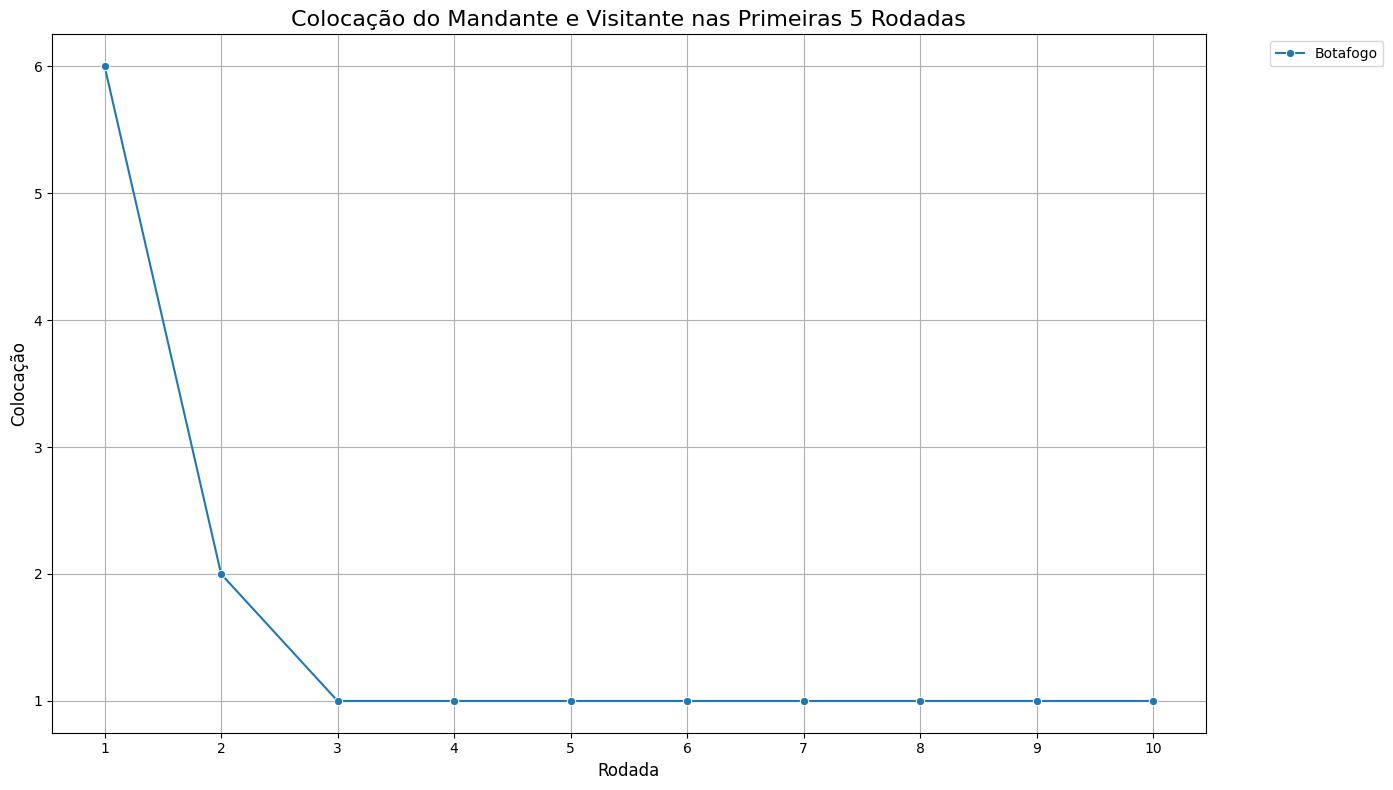

In [16]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data = df_times[
    (df_times['rodada'] <= 10) & 
    (df_times['time'].isin(['Botafogo']))
    ],
    x='rodada', 
    y='colocacao', 
    hue='time', 
    marker='o', 
    legend='brief', 
)

plt.title('Colocação do Mandante e Visitante nas Primeiras 5 Rodadas', fontsize=16)
plt.xlabel('Rodada', fontsize=12)
plt.ylabel('Colocação', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['1', '2', '3', '4', '5','6', '7', '8', '9', '10'])
plt.tight_layout() 
plt.show()

In [17]:
rodadas_colocacao = []
for i in range(1,39):
    colocacao_mmq = ranking_times(df_gols, times, i)
    rodadas_colocacao.append(colocacao_mmq)

In [18]:
lista = []
for rodada_idx, rodada_dados in enumerate(rodadas_colocacao, start=1):
    for posicao, (time, colocacao) in enumerate(rodada_dados, start=1):
        lista.append({"rodada": rodada_idx, "time": time, "colocacao": posicao})

df_colocacao_mmq = pd.DataFrame(lista)

In [19]:
df_colocacao_mmq[df_colocacao_mmq['rodada']==1]

,rodada,time,colocacao
0,1,Flamengo,1
1,1,Fluminense,2
2,1,Athletico-PR,3
3,1,Grêmio,4
4,1,Corinthians,5
5,1,Botafogo,6
6,1,RB Bragantino,7
7,1,Palmeiras,8
8,1,Vasco da Gama,9
9,1,Fortaleza,10


In [20]:
def df_rodadas_mmq(peso):
    rodadas_colocacao = []
    for i in range(1,39):
        colocacao_mmq, _ = ranking_times1(df_gols, i, times, peso)
        rodadas_colocacao.append(colocacao_mmq)

    lista = []
    for rodada_idx, rodada_dados in enumerate(rodadas_colocacao, start=1):
        for posicao, (time, colocacao) in enumerate(rodada_dados, start=1):
            lista.append({"rodada": rodada_idx, "time": time, "colocacao": posicao})

    return pd.DataFrame(lista)

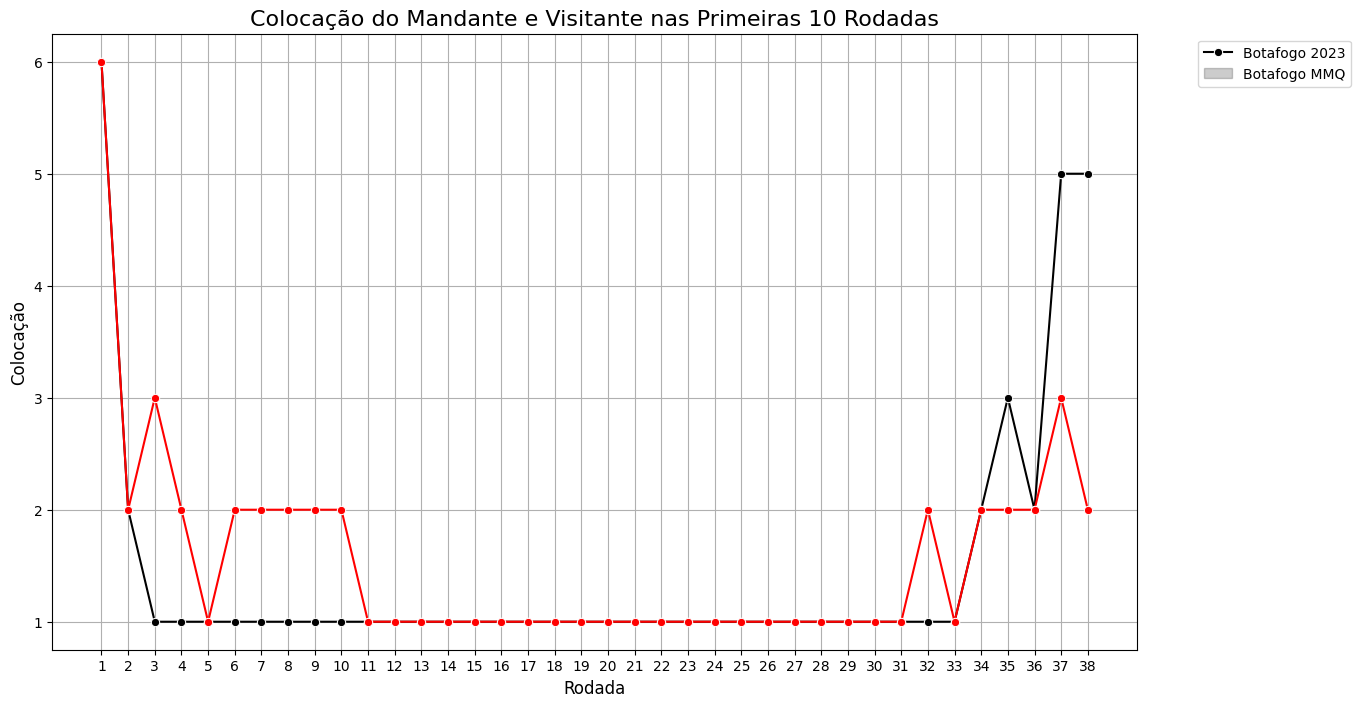

In [21]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_times[
        (df_times['rodada'] <= 38) & 
        (df_times['time'].isin(['Botafogo']))
    ],
    x='rodada', 
    y='colocacao', 
    marker='o', 
    color='black',  
    legend=None
)

sns.lineplot(
    data=df_colocacao_mmq[
        (df_colocacao_mmq['rodada'] <= 38) & 
        (df_colocacao_mmq['time'].isin(['Botafogo']))
    ],
    x='rodada', 
    y='colocacao', 
    marker='o', 
    color='red',  
    legend=None    
)


plt.title('Colocação do Mandante e Visitante nas Primeiras 10 Rodadas', fontsize=16)
plt.xlabel('Rodada', fontsize=12)
plt.ylabel('Colocação', fontsize=12)
plt.legend(['Botafogo 2023', 'Botafogo MMQ'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Gerar os ticks automaticamente com base nos valores únicos da coluna rodada
rodadas = sorted(df_times['rodada'].unique())  # Ordenar rodadas únicas
plt.xticks(ticks=rodadas, labels=[str(r) for r in rodadas])  # Definir ticks e rótulosplt.tight_layout()
plt.show()


In [22]:
def plot_rodadas(time, df_original, df_mmq):
    plt.figure(figsize=(14, 8))

    sns.lineplot(
        data=df_original[
            (df_original['rodada'] <= 38) & 
            (df_original['time'] == time)
        ],
        x='rodada', 
        y='colocacao', 
        marker='o', 
        color='black',  
        legend=None
    )

    sns.lineplot(
        data=df_mmq[
            (df_mmq['rodada'] <= 38) & 
            (df_mmq['time'] == time)
        ],
        x='rodada', 
        y='colocacao', 
        marker='o', 
        color='red',  
        legend=None
    )


    plt.title('Colocação dos Times', fontsize=16)
    plt.xlabel('Rodada', fontsize=12)
    plt.ylabel('Colocação', fontsize=12)
    plt.legend([time + ' 2023', time + ' MMQ'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    # Gerar os ticks automaticamente com base nos valores únicos da coluna rodada
    rodadas = sorted(df_times['rodada'].unique())  # Ordenar rodadas únicas
    plt.xticks(ticks=rodadas, labels=[str(r) for r in rodadas])  # Definir ticks e rótulosplt.tight_layout()
    plt.show()


PRECISO ACERTAR ESSE ERRO QUE ESTA DANDO, SEJA MEXENDO NOS GOLS FORA DE CASA, FINALIZACOES, ETC

In [23]:
def ranking_times1(df, times, rodada, peso_gol_fora):
    pares_e_resultados = []

    for i in range(rodada*10):
        time_mandante = df.iloc[i, 2] # time mandante
        time_visitante = df.iloc[i, 3]  # time visitante
        resultado = df.iloc[i, 4] - df.iloc[i, 5]*peso_gol_fora  # diferença de gols 
        
        pares_e_resultados.append((time_mandante, time_visitante, resultado))

    num_times = len(times)
    num_equacoes = len(pares_e_resultados)
    A = np.zeros((num_equacoes, num_times))
    b = np.zeros(num_equacoes)

    for i, (time1, time2, resultado) in enumerate(pares_e_resultados):
        indice1 = times[time1]
        indice2 = times[time2]
        
        A[i, indice1] = 1    # Sinaliza 1 para time mandante
        A[i, indice2] = -1   # Sinaliza -1 para o tim+e visitante
        b[i] = resultado    # Coloca o resultado na posição correta em b

    x,_,_,_ = np.linalg.lstsq(A, b, rcond=None)

    indice_para_times = {indice: nome for nome, indice in times.items()}

    # Combine os valores de `x` com os nomes dos times usando o dicionário invertido
    times_valores = [(indice_para_times[i], x[i]) for i in range(len(x))]

    # Ordene a lista pelo valor de `x` (segundo item da tupla)
    times_valores_ordenados = sorted(times_valores, key=lambda item: item[1], reverse=True)  # Coloque reverse=False para ordem crescente

    return times_valores_ordenados, x

In [24]:
df_peso_gol_fora = df_rodadas_mmq(1)

TypeError: unsupported operand type(s) for *: 'dict' and 'int'

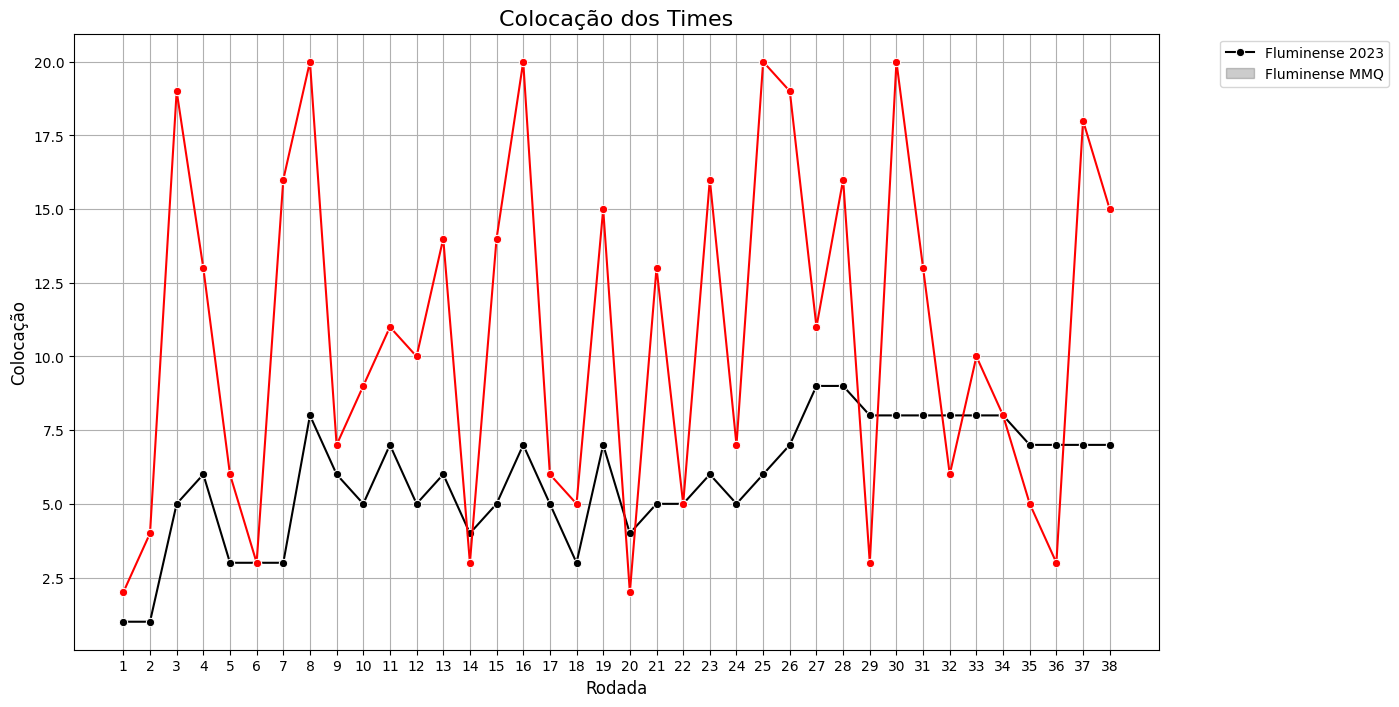

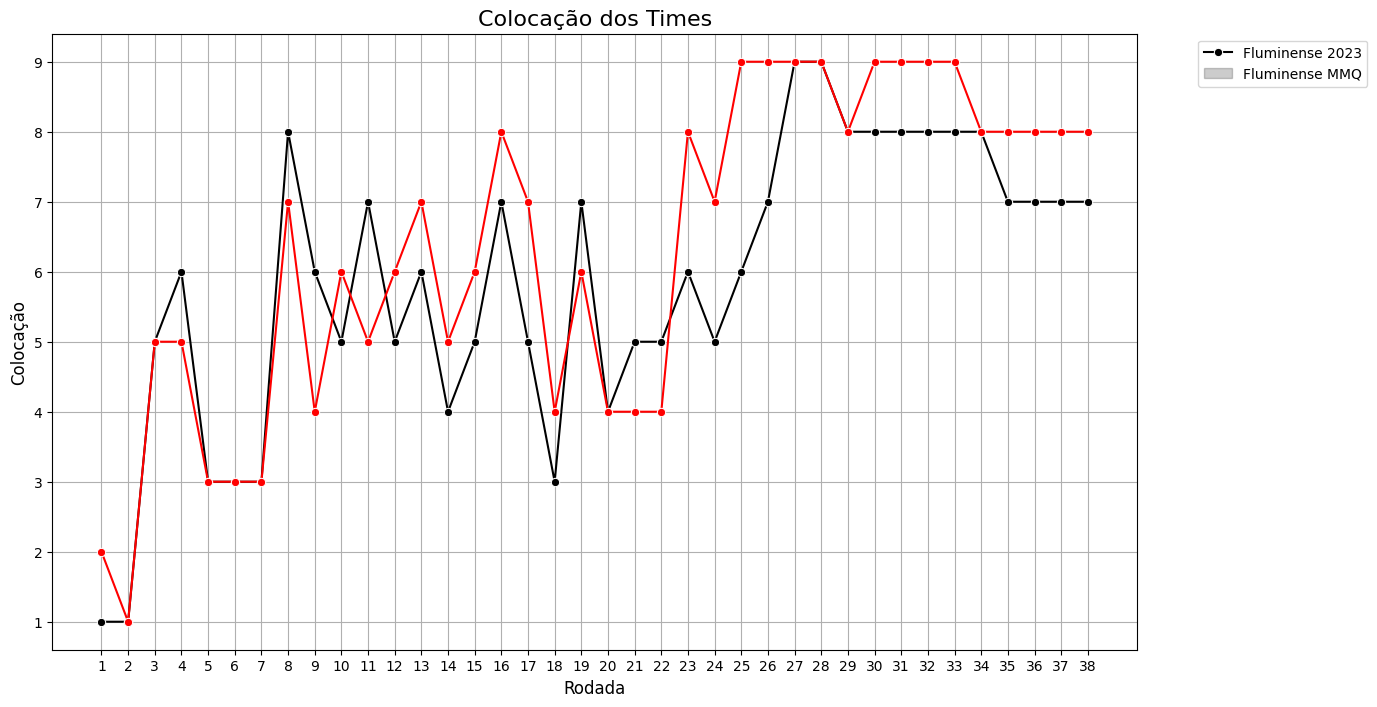

In [ ]:
plot_rodadas("Fluminense", df_times, df_peso_gol_fora)
plot_rodadas("Fluminense", df_times, df_colocacao_mmq)

In [ ]:
from scipy.stats import spearmanr
import numpy as np
import pandas as pd

def medir_correlacao(ranking_modelado, ranking_real):
    if len(ranking_modelado) != len(ranking_real):
        raise ValueError("Os rankings modelado e real devem ter o mesmo tamanho.")

    # Transformar o ranking em posições
    posicoes_modelado = pd.Series(ranking_modelado).rank(ascending=False)
    posicoes_real = pd.Series(ranking_real).rank(ascending=False)

    # Calcular correlação de Spearman
    correlacao, _ = spearmanr(posicoes_modelado, posicoes_real)
    return correlacao


melhor_peso = None
melhor_correlacao = -1
pesos_testados = np.linspace(1.0, 2.0, 50)

for peso in pesos_testados:
    total_correlacao = 0
    rodadas_validas = 0

    for i in range(1, 39):
        try:
            _, ranking_modelado = ranking_times1(df, i, times, peso)
            ranking_real = df_times[df_times['rodada'] == i]['colocacao'].values

            if len(ranking_modelado) == len(ranking_real):
                correlacao = medir_correlacao(
                    [item[1] for item in ranking_modelado],
                    ranking_real
                )
                total_correlacao += correlacao
                rodadas_validas += 1
        except Exception as e:
            print(f"Erro na rodada {i} com peso {peso:.2f}: {e}")
            continue

    # Calcular correlação média para o peso atual
    if rodadas_validas > 0:
        correlacao_media = total_correlacao / rodadas_validas
        print(f"Peso: {peso:.2f}, Correlação Média: {correlacao_media:.4f}")

        if correlacao_media > melhor_correlacao:
            melhor_peso = peso
            melhor_correlacao = correlacao_media

print(f"\nMelhor Peso: {melhor_peso:.2f}, Melhor Correlação Média: {melhor_correlacao:.4f}")



Erro na rodada 1 com peso 1.00: 'Ceará SC'
Erro na rodada 2 com peso 1.00: 'Ceará SC'
Erro na rodada 3 com peso 1.00: 'Juventude'
Erro na rodada 4 com peso 1.00: 'Ceará SC'
Erro na rodada 5 com peso 1.00: 'Juventude'
Erro na rodada 6 com peso 1.00: 'Ceará SC'
Erro na rodada 7 com peso 1.00: 'Ceará SC'
Erro na rodada 8 com peso 1.00: 'Sport Recife'
Erro na rodada 9 com peso 1.00: 'Atlético-GO'
Erro na rodada 10 com peso 1.00: 'Juventude'
Erro na rodada 11 com peso 1.00: 'Chapecoense'
Erro na rodada 12 com peso 1.00: 'Ceará SC'
Erro na rodada 13 com peso 1.00: 'Atlético-GO'
Erro na rodada 14 com peso 1.00: 'Sport Recife'
Erro na rodada 15 com peso 1.00: 'Chapecoense'
Erro na rodada 16 com peso 1.00: 'Atlético-GO'
Erro na rodada 17 com peso 1.00: 'Ceará SC'
Erro na rodada 18 com peso 1.00: 'Juventude'
Erro na rodada 19 com peso 1.00: 'Atlético-GO'
Erro na rodada 20 com peso 1.00: 'Ceará SC'
Erro na rodada 21 com peso 1.00: 'Ceará SC'
Erro na rodada 22 com peso 1.00: 'Ceará SC'
Erro na rod

KeyboardInterrupt: 

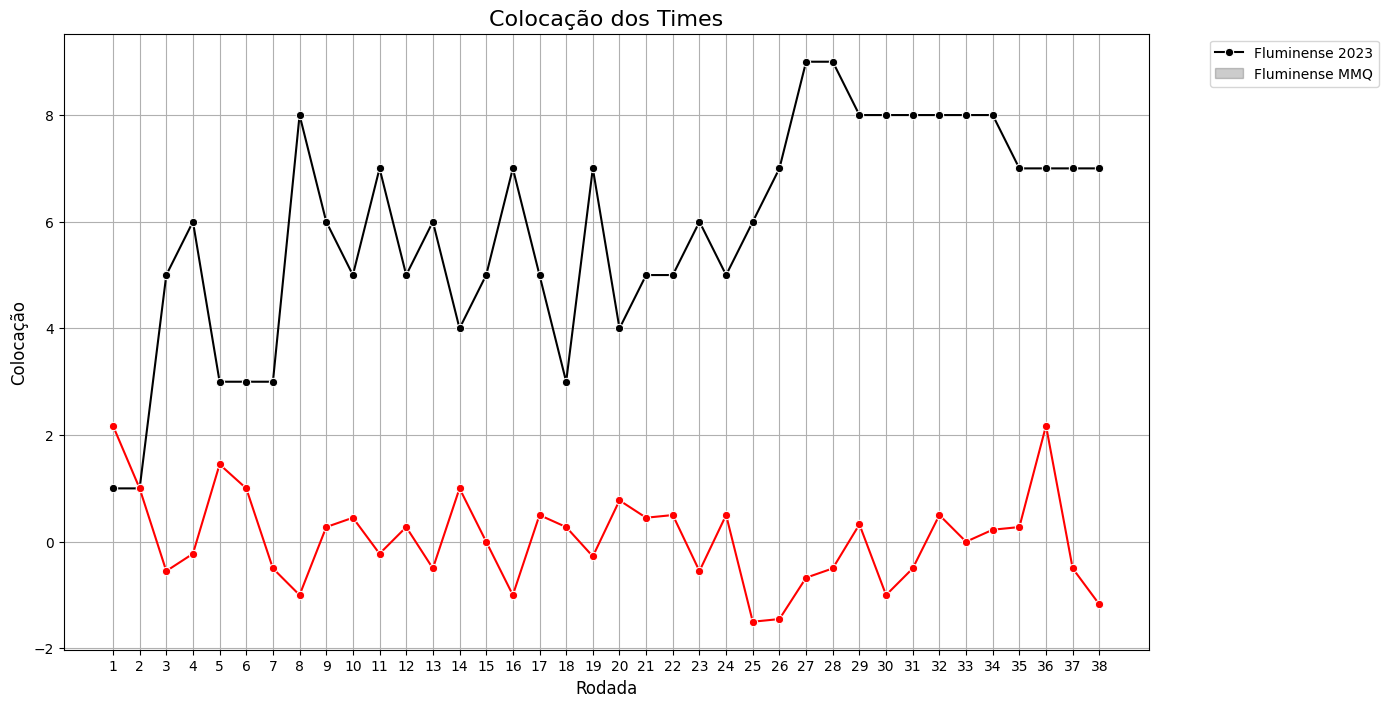

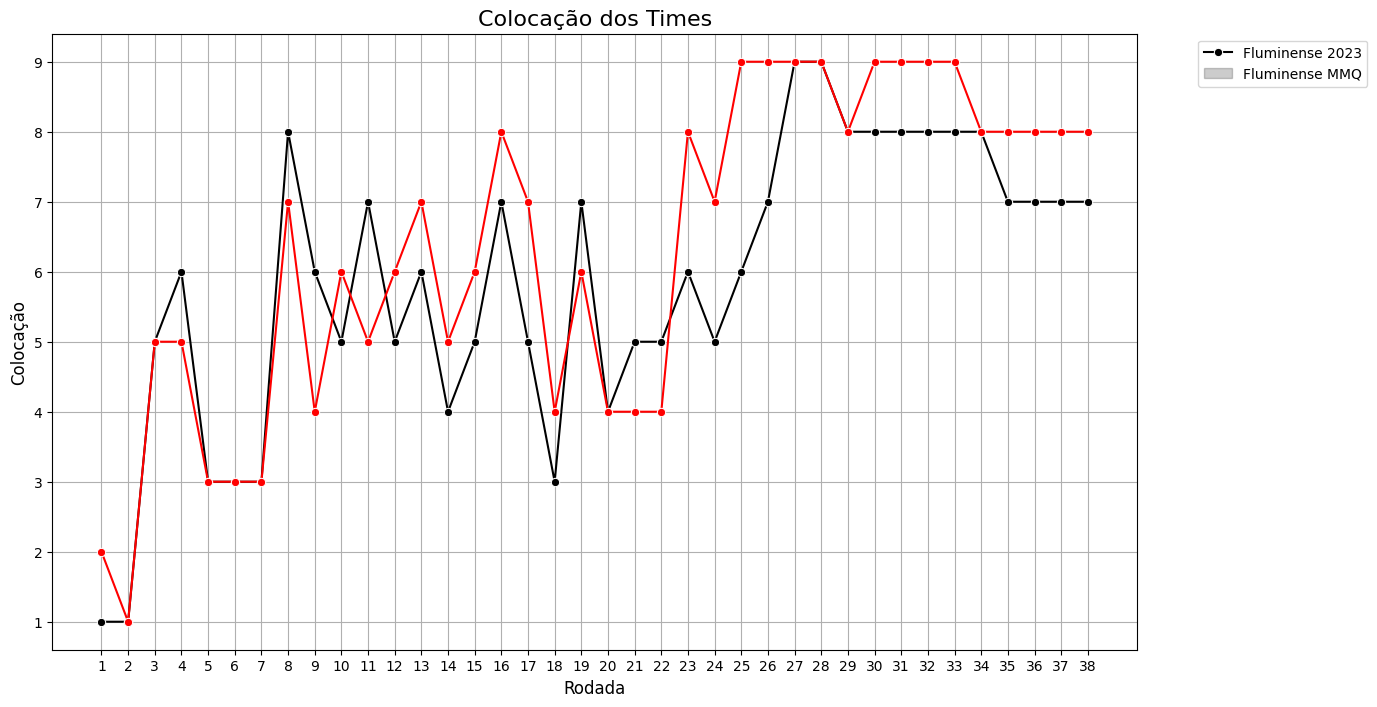

In [ ]:
df_peso_gol_fora = df_rodadas_mmq(1.45)
plot_rodadas("Fluminense", df_times, df_peso_gol_fora)
plot_rodadas("Fluminense", df_times, df_colocacao_mmq)